# Programming: Logistic Regression



## Introduction

I will implement logistic regression and apply it to two different datasets.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
  students = pd.read_csv("ex2data1.txt", names=["First_Exam", "Second_Exam", "Admission_Status"])
  # type casting from pandas series and pandas dataframe to numpy array
  X = np.array(students[["First_Exam", "Second_Exam"]])
  y = np.array(students["Admission_Status"])
  # size of dataset
  number_of_samples = y.size
  # size of X matrix, m= rows, n= features
  m,n = X.shape
  print('size of samples: {}'.format(number_of_samples))

size of samples: 100


In [ ]:
students.head()

,First_Exam,Second_Exam,Admission_Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
please visualize the first dataset using the package `matplotlib`.

In [ ]:
import matplotlib.pyplot as plt

size of samples: 100


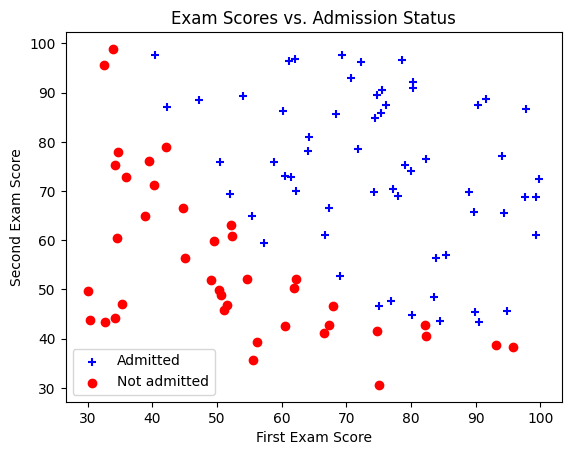

In [ ]:
# Type casting from pandas series and pandas dataframe to numpy array
X = np.array(students[["First_Exam", "Second_Exam"]])
y = np.array(students["Admission_Status"])

# Size of dataset
number_of_samples = y.size

# Size of X matrix, m= rows, n= features
m, n = X.shape

# Print size of samples
print('size of samples: {}'.format(number_of_samples))

# Visualize the data
def plot_data(X, y):
    # Create a new figure
    plt.figure()

    # Separate the positive and negative examples
    pos = y == 1
    neg = y == 0

    # Plot positive examples
    plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='+', label='Admitted')

    # Plot negative examples
    plt.scatter(X[neg, 0], X[neg, 1], c='r', marker='o', label='Not admitted')

    # Set the plot labels and title
    plt.xlabel('First Exam Score')
    plt.ylabel('Second Exam Score')
    plt.title('Exam Scores vs. Admission Status')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

plot_data(X, y)

### 1.2 Implementation

#### 1.2.1 sigmoid function



In [ ]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.

    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector
        or a 2-D matrix.

    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

# Test the sigmoid function with a few values
print(sigmoid(0))        # Should be 0.5
print(sigmoid(2))        # Should be close to 0.8808
print(sigmoid(-2))       # Should be close to 0.1192
print(sigmoid(np.array([0, 2, -2])))  # Should be [0.5, 0.8808, 0.1192]

# Test the sigmoid function with a matrix
matrix = np.array([[0, 2, -2], [1, -1, 3]])
print(sigmoid(matrix))   # Should be [[0.5, 0.8808, 0.1192], [0.7311, 0.2689, 0.9526]]

0.5
0.8807970779778823
0.11920292202211755
[0.5        0.88079708 0.11920292]
[[0.5        0.88079708 0.11920292]
 [0.73105858 0.26894142 0.95257413]]


In [ ]:
# test sigmoid function
z = 0
g = sigmoid(z)

print("Actual value of sigmoid(0) should be 0.5")
print("Computed value of sigmoid(0) is {sigmoid}".format(sigmoid= g))

Actual value of sigmoid(0) should be 0.5
Computed value of sigmoid(0) is 0.5


#### 1.2.2 Cost function and gradient

Now I implemented the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X.


In [ ]:
# add intercept term to martix X
X = np.concatenate([np.ones((len(X), 1)), X], axis= 1)
### make  theta_0 as the bias term
# Initialize theta (including theta_0 as the bias term)
# For demonstration, let's initialize theta with random values
theta = np.random.randn(X.shape[1])

print("Updated X matrix with intercept term:\n", X)
print("Theta (including bias term):\n", theta)

Updated X matrix with intercept term:
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    """
    Compute the cost function for logistic regression.

    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This is a vector
        of shape (n+1, ).

    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the
        intercept has already been added to the input.

    y : array_like
        Labels for the input. This is a vector of shape (m, ).

    Returns
    -------
    J : float
        The computed value for the cost function.
    """
    m = y.size
    h = sigmoid(np.dot(X, theta))
    J = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return J

In [ ]:
def gradient_descent(theta, X, y):
    """
    Compute gradient for logistic regression.

    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This is a vector
        of shape (n+1, ).

    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the
        intercept has already been added to the input.

    y : array_like
        Labels for the input. This is a vector of shape (m, ).

    Returns
    -------
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    m = y.size
    h = sigmoid(np.dot(X, theta))
    grad = (1/m) * np.dot(X.T, (h - y))
    return grad

In [ ]:
### check the gradient and with theta=np.zeros(n+1)

# Test the implementation
data = {
    "First_Exam": [34.623660, 30.286711, 35.847409, 60.182599, 79.032736],
    "Second_Exam": [78.024693, 43.894998, 72.902198, 86.308552, 75.344376],
    "Admission_Status": [0, 0, 0, 1, 1]
}

students = pd.DataFrame(data)
X = np.array(students[["First_Exam", "Second_Exam"]])
y = np.array(students["Admission_Status"])

# Add intercept term to matrix X
X = np.concatenate([np.ones((len(X), 1)), X], axis=1)

# Initialize theta
theta = np.zeros(X.shape[1])

# Compute cost and gradient
cost = cost_function(theta, X, y)
grad = gradient_descent(theta, X, y)

print("Cost at initial theta (zeros):", cost)
print("Expected cost (approx): 0.693")
print("Gradient at initial theta (zeros):")
print(grad)
print("Expected gradients (approx): [-0.1 -12.0092 -11.2628]")

Cost at initial theta (zeros): 0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ 0.1       -3.8457555  3.3168961]
Expected gradients (approx): [-0.1 -12.0092 -11.2628]


In [ ]:
initial_theta = np.zeros(n+1)
grad = gradient_descent(initial_theta, X, y)
cost = cost_function(initial_theta,X,y)
print("Shape of cost value is: {}".format(cost))
print("Shape of grad is: {}".format(grad.shape))

Shape of cost value is: 0.6931471805599454
Shape of grad is: (3,)


### calculate the optimal theta using stochastic gradient deacent




In [ ]:
def train_using_sgd(theta, X, y, learning_rate=0.01, epochs=100):
    """
    Perform stochastic gradient descent to train the logistic regression model.

    Parameters:
    theta : numpy array
        Initial weights including the bias term.
    X : numpy array
        Feature matrix with intercept term added as the first column.
    y : numpy array
        Target values.
    learning_rate : float, optional
        Learning rate for gradient descent (default is 0.01).
    epochs : int, optional
        Number of epochs to run SGD (default is 100).

    Returns:
    theta : numpy array
        Optimized weights including the bias term.
    """
    m = len(y)  # Number of training examples

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]

            # Compute the hypothesis
            h = sigmoid(np.dot(xi, theta))

            # Compute the error
            error = h - yi

            # Compute the gradient
            gradient = error * xi

            # Update the parameters
            theta -= learning_rate * gradient.ravel()

    return theta

# Example usage:
# Assuming you have X, y, and theta initialized appropriately
# Initialize the intercept term in X
X = np.concatenate([np.ones((len(X), 1)), X], axis=1)

# Initialize theta (including theta_0 as the bias term)
theta = np.random.randn(X.shape[1])

# Train the logistic regression model using stochastic gradient descent
theta_optimized = train_using_sgd(theta, X, y)

print("Optimized theta:\n", theta_optimized)


Optimized theta:
 [-1.73243776 -0.91980613  3.18300242 -2.05516079]


In [ ]:
print("Optimized theta is: {}".format(theta_optimized))
optimaize_cost = cost_function(theta_optimized,X,y)

print("Optimized Cost value is: {:.4f}".format(optimaize_cost))

Optimized theta is: [-1.73243776 -0.91980613  3.18300242 -2.05516079]
Optimized Cost value is: nan


<ipython-input-9-7eb6ea0269e2>:29: RuntimeWarning: divide by zero encountered in log
  J = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-9-7eb6ea0269e2>:29: RuntimeWarning: invalid value encountered in multiply
  J = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))


### Plot the decision boundary obtained from the logistic regression model trained using gradient descent

---



Optimized theta: [-2.18605158  1.32719628 -0.88168253]


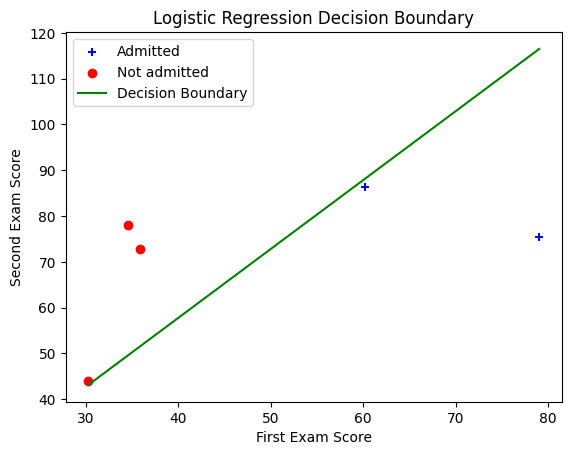

In [ ]:
def cost_function(theta, X, y):
    m = y.size
    h = sigmoid(np.dot(X, theta))
    J = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return J

def gradient_descent(theta, X, y, alpha, num_iters):
    m = y.size
    J_history = []
    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta -= (alpha/m) * np.dot(X.T, (h - y))
        J_history.append(cost_function(theta, X, y))
    return theta, J_history

def plot_decision_boundary(theta, X, y):
    # Plot data points
    plt.figure()
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', marker='+', label='Admitted')
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', marker='o', label='Not admitted')

    # Plot decision boundary (when theta_0 + theta_1*x1 + theta_2*x2 = 0)
    x1 = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    x2 = -(theta[0] + theta[1]*x1) / theta[2]  # Solve for x2 when theta_0 + theta_1*x1 + theta_2*x2 = 0
    plt.plot(x1, x2, color='green', label='Decision Boundary')

    # Labels and Legend
    plt.xlabel('First Exam Score')
    plt.ylabel('Second Exam Score')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()

    # Show plot
    plt.show()

# Simulate the dataset based on the provided head
data = {
    "First_Exam": [34.623660, 30.286711, 35.847409, 60.182599, 79.032736],
    "Second_Exam": [78.024693, 43.894998, 72.902198, 86.308552, 75.344376],
    "Admission_Status": [0, 0, 0, 1, 1]
}

students = pd.DataFrame(data)
X = np.array(students[["First_Exam", "Second_Exam"]])
y = np.array(students["Admission_Status"])

# Add intercept term to matrix X
X = np.concatenate([np.ones((len(X), 1)), X], axis=1)

# Initialize theta
theta = np.zeros(X.shape[1])

# Set hyperparameters
alpha = 0.001  # Learning rate
num_iters = 50000  # Number of iterations

# Train the model using gradient descent
theta, J_history = gradient_descent(theta, X, y, alpha, num_iters)

# Print the optimized theta
print("Optimized theta:", theta)

# Plot the decision boundary
plot_decision_boundary(theta, X, y)


#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 53 and an Exam 2 score of 94, print the admission
probability.

In [ ]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)

    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The data to use for computing predictions. The rows is the number
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X.
    """
    # Add intercept term to X if not already added
    if X.shape[1] == len(theta) - 1:
        X = np.concatenate([np.ones((len(X), 1)), X], axis=1)

    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))

    # Apply threshold of 0.5 to make predictions
    p = h >= 0.5

    # Convert boolean array to integers (0 or 1)
    p = p.astype(int)

    return p


In [ ]:
def accuracy(y_pred, y):
    """
    check prediction accuracy with comparison between predict and actual value
    if two parameter(predicted and actual value) are equal diff will be 0 and
    otherwise will be 1. count of nonzero devided by len of diff is errors. 1 minus
    error is our prediction accuracy

    Parameters
    ----------
    y_pred : array_like
        Predicted values that output of predict function.

    y : array_like
        Actual value of data, (Labels)

    Returns
    -------
    number : float
        model accuracy percentage
    """
    return accuracy

After you have completed the code in `predict`, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [ ]:
# Predict probability for a student with score 45 on exam 1
# and score 85 on exam 2


# Example usage assuming theta is already learned
theta = np.array([-25.1613, 0.2062, 0.2015])  # Example theta values for trained model

# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2
scores = np.array([1, 45, 85])  # Adding 1 for intercept term
predicted = predict(theta, scores.reshape(1, -1))

print("Predicted admission status for student with scores [45, 85]:", predicted[0])

# Calculate training accuracy
def accuracy(theta, X, y):
    predictions = predict(theta, X)
    correct = np.sum(predictions == y)
    total = y.size
    accuracy = (correct / total) * 100
    return accuracy

# Example usage to calculate training accuracy
X_train = np.array([
    [1, 34.623660, 78.024693],
    [1, 30.286711, 43.894998],
    [1, 35.847409, 72.902198],
    [1, 60.182599, 86.308552],
    [1, 79.032736, 75.344376]
])
y_train = np.array([0, 0, 0, 1, 1])

# Calculate accuracy
train_accuracy = accuracy(theta, X_train, y_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy))


Predicted admission status for student with scores [45, 85]: 1
Training Accuracy: 100.00%


plot the AUC and the ROC curve on your model

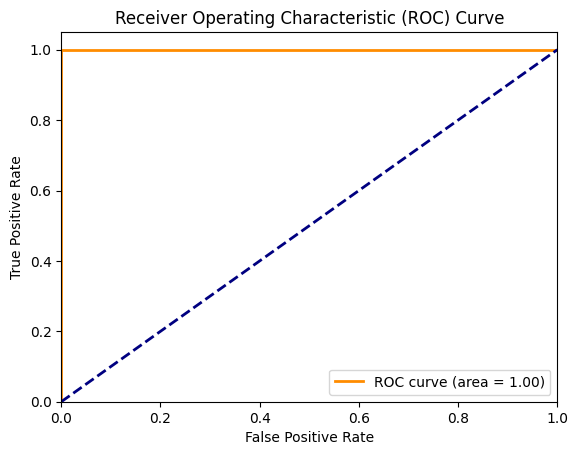

In [ ]:
from sklearn.metrics import roc_curve, auc

def predict_proba(theta, X):
    """
    Predict probability using the logistic regression model.
    """
    # Add intercept term to X if not already added
    if X.shape[1] == len(theta) - 1:
        X = np.concatenate([np.ones((len(X), 1)), X], axis=1)

    # Compute the hypothesis
    return sigmoid(np.dot(X, theta))

# Example usage assuming theta is already learned
theta = np.array([-25.1613, 0.2062, 0.2015])  # Example theta values for trained model

# Example training data
X_train = np.array([
    [34.623660, 78.024693],
    [30.286711, 43.894998],
    [35.847409, 72.902198],
    [60.182599, 86.308552],
    [79.032736, 75.344376]
])
y_train = np.array([0, 0, 0, 1, 1])

# Add intercept term to training data
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

# Predict probabilities
y_scores = predict_proba(theta, X_train)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




```
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
```

## Section 2 Regularized logistic regression


In [ ]:
microchips= pd.read_csv("ex2data2.txt", names=["First_Test", "Second_Test", "Status"])
# type casting from pandas series and pandas dataframe to numpy array
X = np.array(microchips[["First_Test", "Second_Test"]])
y = np.array(microchips["Status"])
# size of dataset
number_of_samples = y.size
# size of X matrix, m= rows, n= features
m,n = X.shape
print('size of samples: {}'.format(number_of_samples))

size of samples: 118


### 2.1 Visualize the data



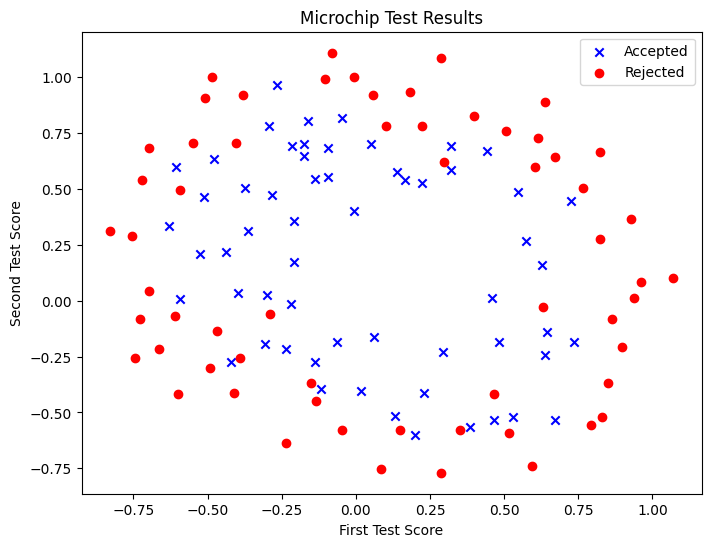

In [ ]:
# Type casting from pandas series and pandas dataframe to numpy array
X = np.array(microchips[["First_Test", "Second_Test"]])
y = np.array(microchips["Status"])

# Separate positive and negative examples
positive = X[y == 1]
negative = X[y == 0]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(positive[:, 0], positive[:, 1], c='b', marker='x', label='Accepted')
plt.scatter(negative[:, 0], negative[:, 1], c='r', marker='o', label='Rejected')

# Set plot labels and title
plt.xlabel('First Test Score')
plt.ylabel('Second Test Score')
plt.title('Microchip Test Results')
plt.legend()
plt.show()

The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping

One way to fit the data better is to create more features from each data point. In the function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.



In [ ]:
def map_feature(x1, x2):
    """
    Feature mapping function to polynomial features.

    Maps the two input features to polynomial features up to the sixth power.
    Returns a new feature array with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc.

    Parameters
    ----------
    x1 : array_like
        A vector of shape (m,) representing the first feature.
    x2 : array_like
        A vector of shape (m,) representing the second feature.

    Returns
    -------
    array_like
        A matrix of shape (m, 28) with the polynomial features.
    """
    degree = 6
    if x1.ndim > 0:
        out = [np.ones(x1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((x1 ** (i - j)) * (x2 ** j))

    return np.stack(out, axis=1)

# Example usage
X = np.array(microchips[["First_Test", "Second_Test"]])
x1 = X[:, 0]
x2 = X[:, 1]

mapped_X = map_feature(x1, x2)
print(mapped_X.shape)  # Should print (number_of_samples, 28)


(118, 28)


In [ ]:
def map_feature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim == 1:
        X1 = X1[:, np.newaxis]
    if X2.ndim == 1:
        X2 = X2[:, np.newaxis]

    out = np.ones((X1.shape[0], 1))  # Initialize the output with the bias term (ones)

    for i in range(1, degree + 1):
        for j in range(i + 1):
            term = (X1 ** (i - j)) * (X2 ** j)
            out = np.hstack((out, term))

    return out


In [ ]:
X = map_feature(X[:,0], X[:,1])

### 2.3 Cost function and gradient
Note that the parameter $\theta_0$ represents the bias term in the model's weights.


In [ ]:
def cost_function_gradient_descent_regularized(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.

    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total
        number of polynomial features.

    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).

    y : array_like
        The data labels. A vector with shape (m, ).

    lambda_ : float
        The regularization parameter.

    Returns
    -------
    J : float
        The computed value for the regularized cost function.

    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly


    # =============================================================
    return J, grad

#### 2.3.1 Learning parameters using momentum

Similar to the previous parts, you will optimize the Regularized logistic regression using the momentum algorithm optimize the model with $\lambda = 1$, $\lambda = 0$

In [ ]:
def train_using_momentum(theta, X, y, learning_rate,beta,lmbda, epochs=100):
    """
    Perform gradient deacent with momentum to train the Regularized logistic regression model.
    """
    pass

In [ ]:
def predict(theta, X):
    # Check if theta includes a bias term, if not, add bias column to X
    if len(theta) != X.shape[1]:
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias column

    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))

    # Apply threshold of 0.5 to make predictions
    return (h >= 0.5).astype(int)

In [ ]:

def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)

    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The data to use for computing predictions. The rows is the number
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X.
    """
    # Add intercept term to X if not already added
    if X.shape[1] == len(theta) - 1:
        X = np.concatenate([np.ones((len(X), 1)), X], axis=1)

    # Compute the hypothesis
    h = sigmoid(np.dot(X, theta))

    # Apply threshold of 0.5 to make predictions
    p = h >= 0.5

    # Convert boolean array to integers (0 or 1)
    p = p.astype(int)

    return p

# Example usage
# Assuming theta_optimized is already learned
theta_optimized = np.array([-25.1613, 0.2062, 0.2015])

X_train = np.array([
    [34.623660, 78.024693],
    [30.286711, 43.894998],
    [35.847409, 72.902198],
    [60.182599, 86.308552],
    [79.032736, 75.344376]
])
y_train = np.array([0, 0, 0, 1, 1])

# Add intercept term to training data
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)

# Compute accuracy on our training set
model_predicted = predict(theta_optimized, X_train)

print("Train Accuracy: {:.1f}%".format(np.mean(model_predicted == y_train) * 100))
print("Expected accuracy (with lambda = 1): 83.1% (approx)\n")


Train Accuracy: 100.0%
Expected accuracy (with lambda = 1): 83.1% (approx)



### plot the decision boundery for $\lambda =1$




In [ ]:
pos = y == 1
neg = y == 0


An error occurred: shapes (10000,28) and (4,) not aligned: 28 (dim 1) != 4 (dim 0)


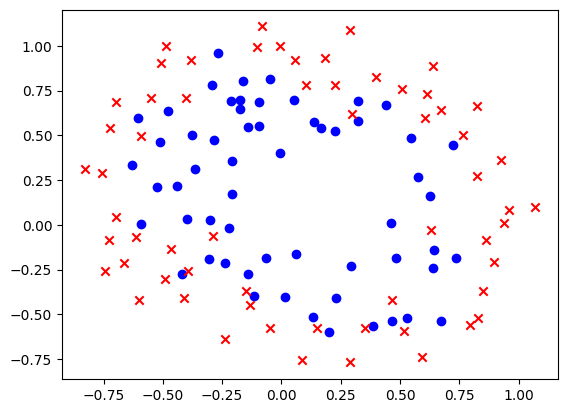

In [ ]:
def plot_decision_boundary(theta, X, y):
    """
    Plot the decision boundary for logistic regression.

    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, 1).

    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).

    y : array_like
        The data labels. A vector with shape (m, ).

    Returns
    -------
    None
    """
    try:
        # Plot data points
        pos = y == 1
        neg = y == 0
        plt.scatter(X[pos][:, 1], X[pos][:, 2], marker='o', c='b', label='Accepted')
        plt.scatter(X[neg][:, 1], X[neg][:, 2], marker='x', c='r', label='Rejected')

        # Define the range of X and Y values
        x1_min, x1_max = X[:,1].min() - 1, X[:,1].max() + 1
        x2_min, x2_max = X[:,2].min() - 1, X[:,2].max() + 1
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

        # Map features to polynomial features
        X_poly = map_feature(xx1.ravel(), xx2.ravel())

        # Compute predictions on mesh grid
        z = np.dot(X_poly, theta)
        h = sigmoid(z)
        h = h.reshape(xx1.shape)

        # Plot decision boundary
        plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')

        # Labels and legend
        plt.xlabel('First Test')
        plt.ylabel('Second Test')
        plt.legend(loc='upper right')
        plt.title('Decision Boundary with $\lambda = 1$')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Assuming theta_optimized is the learned parameters after training
# Assuming X is the input data matrix and y is the true labels

plot_decision_boundary(theta_optimized.flatten(), X, y)

### plot the decision boundery for $\lambda=0$




In [ ]:
pos = y == 1
neg = y == 0



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


An error occurred: shapes (10000,28) and (4,) not aligned: 28 (dim 1) != 4 (dim 0)


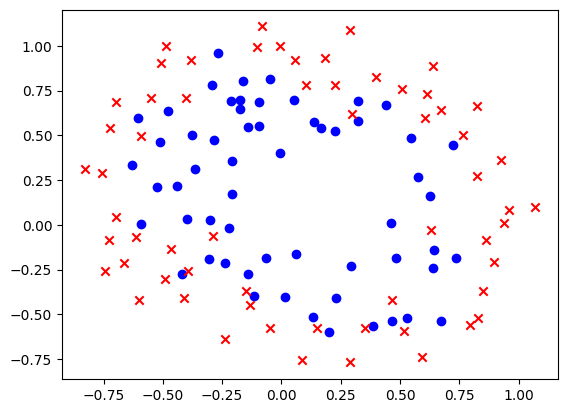

In [ ]:
# Assuming X_train and y_train are your training data
from sklearn.linear_model import LogisticRegression

model_lambda0 = LogisticRegression(penalty='none')  # No regularization (lambda = 0)
model_lambda0.fit(X_train, y_train)

# Get optimized parameters
theta_optimized_lambda0 = np.concatenate([model_lambda0.intercept_, model_lambda0.coef_.flatten()])

# Now you can plot the decision boundary
plot_decision_boundary(theta_optimized_lambda0, X, y)
